In [14]:
import time 
import datetime
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2010,1,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2019,12,31,23,59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2010-01-04   7.622500   7.660714   7.585000   7.643214   6.478998   
1     2010-01-05   7.664286   7.699643   7.616071   7.656429   6.490199   
2     2010-01-06   7.656429   7.686786   7.526786   7.534643   6.386964   
3     2010-01-07   7.562500   7.571429   7.466071   7.520714   6.375156   
4     2010-01-08   7.510714   7.571429   7.466429   7.570714   6.417542   
...          ...        ...        ...        ...        ...        ...   
2511  2019-12-24  71.172501  71.222504  70.730003  71.067497  69.236237   
2512  2019-12-26  71.205002  72.495003  71.175003  72.477501  70.609909   
2513  2019-12-27  72.779999  73.492500  72.029999  72.449997  70.583099   
2514  2019-12-30  72.364998  73.172501  71.305000  72.879997  71.002029   
2515  2019-12-31  72.482498  73.419998  72.379997  73.412498  71.520813   

         Volume  
0     493729600  
1     601904800  
2     552160000  
3     477131200  
4     447

In [15]:
df = df.reset_index()
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490199,601904800
2,2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
4,4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


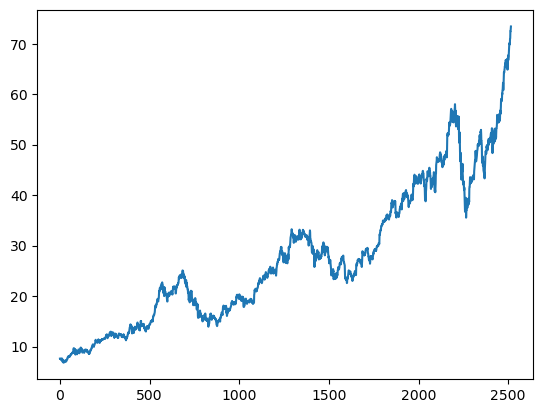

In [16]:
plt.plot(df.Close)

In [17]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
2515    60.331875
Name: Close, Length: 2516, dtype: float64

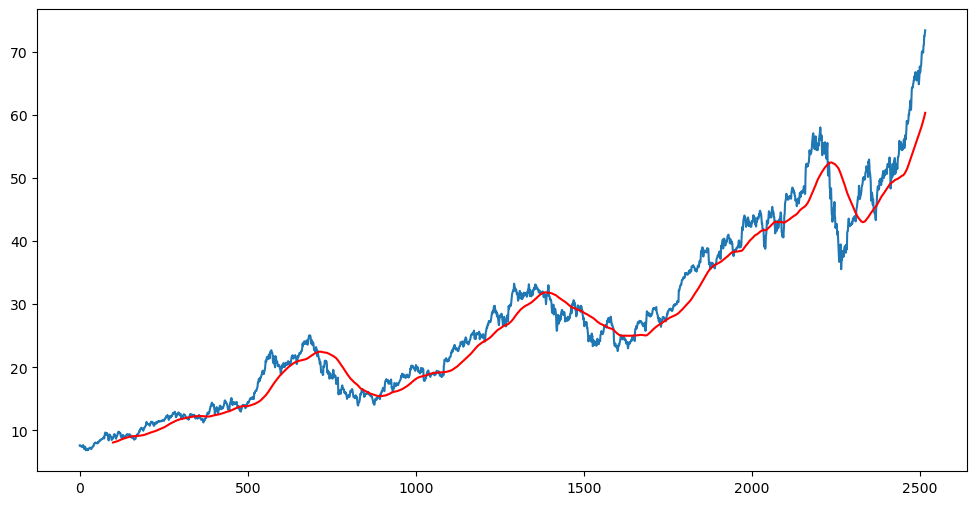

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [19]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
2515    54.793137
Name: Close, Length: 2516, dtype: float64

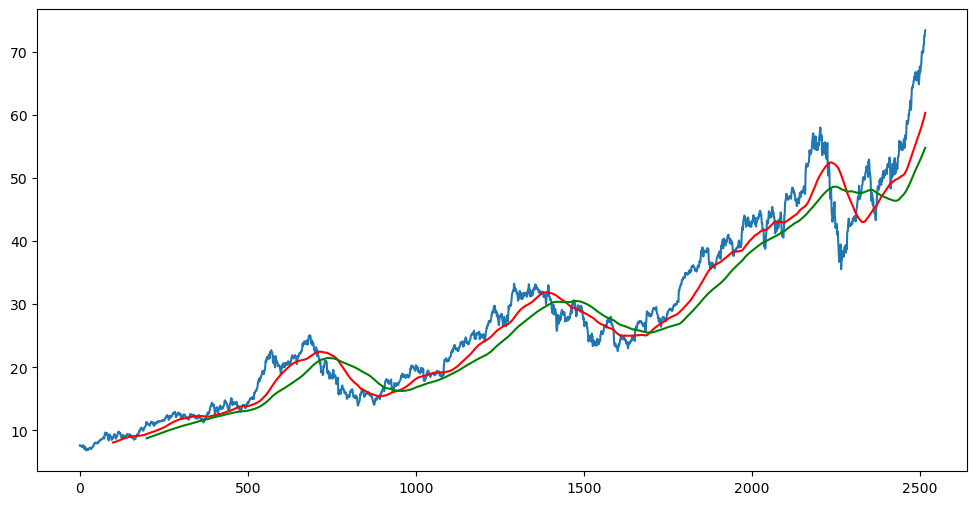

In [20]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [21]:
df.shape

(2516, 8)

In [22]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(755, 1)


In [23]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [24]:
data_testing.head()

,Close
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500
1765,29.477501


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021855],
       [0.02560389],
       ...,
       [0.85089658],
       [0.84616013],
       [0.84587594]])

In [27]:
data_training_array.shape

(1761, 1)

In [28]:
x_train =[]
y_train =[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train =np.array(x_train), np.array(y_train)   

In [29]:
x_train.shape

(1661, 100, 1)

In [30]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units =50, activation ='relu', return_sequences =True, input_shape =(x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units =60, activation ='relu', return_sequences =True))
model.add(Dropout(0.3))


model.add(LSTM(units =80, activation ='relu', return_sequences =True))
model.add(Dropout(0.4))


model.add(LSTM(units =120, activation ='relu'))
model.add(Dropout(0.5))


model.add(Dense(units =1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
model.compile(optimizer='adam',loss ='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 27s 426ms/step - loss: 0.0676
Epoch 2/50
52/52 [==============================] - 25s 480ms/step - loss: 0.0136
Epoch 3/50
52/52 [==============================] - 25s 489ms/step - loss: 0.0107
Epoch 4/50
52/52 [==============================] - 27s 516ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 24s 464ms/step - loss: 0.0097
Epoch 6/50
52/52 [==============================] - 18s 337ms/step - loss: 0.0086
Epoch 7/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0089
Epoch 8/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0082
Epoch 9/50
52/52 [==============================] - 12s 233ms/step - loss: 0.0087
Epoch 10/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0081
Epoch 11/50
52/52 [==============================] - 13s 252ms/step - loss: 0.0074
Epoch 12/50
52/52 [==============================] - 12s 239ms/step - loss: 0.0071
Epoch 13/50
5

In [34]:
model.save('keras_model.h5')

In [35]:
past_100_days =data_training.tail(100)

In [36]:
final_df =past_100_days.append(data_testing,ignore_index=True)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_110264\133886352.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df =past_100_days.append(data_testing,ignore_index=True)


In [37]:
final_df.head()

,Close
0,27.202499
1,27.000000
2,26.982500
3,27.045000
4,27.370001


In [38]:
input_data =scaler.fit_transform(final_df)
input_data

array([[0.02981314],
       [0.02556164],
       [0.02519423],
       [0.02650643],
       [0.03332988],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823855],
       [0.03002312],
       [0.02571911],
       [0.02330466],
       [0.01999794],
       [0.01936807],
       [0.01506406],
       [0.01558894],
       [0.0188957 ],
       [0.02414449],
       [0.02398698],
       [0.02745121],
       [0.01254462],
       [0.        ],
       [0.01212475],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188329],
       [0.05484991],
       [0.05479742],
       [0.05469246],
       [0.06030867],
       [0.05028346],
       [0.05117573],
       [0.05227798],
       [0.05679194],
       [0.0475016 ],
       [0.05206807],
       [0.04928617],
       [0.05180561],
       [0.05206807],
       [0.05647703],
       [0.05736931],
       [0.06781445],
       [0.06912664],
       [0.07458535],
       [0.07269582],
       [0.076

In [39]:
input_data.shape

(855, 1)

In [40]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test =np.array(x_test), np.array(y_test)  
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [41]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 49ms/step


In [42]:
y_predicted.shape

(755, 1)

In [43]:
y_test

array([0.0666072 , 0.0683393 , 0.06765694, 0.07075375, 0.0775772 ,
       0.08324586, 0.08387573, 0.08723496, 0.08461056, 0.08350832,
       0.08854716, 0.08849465, 0.08739242, 0.08854716, 0.08896706,
       0.08838969, 0.09841487, 0.09872984, 0.09878228, 0.09710267,
       0.09563303, 0.13447409, 0.13331936, 0.1362062 , 0.14255719,
       0.14906574, 0.15174258, 0.15373716, 0.15216251, 0.15830357,
       0.16738405, 0.16995591, 0.16911617, 0.17105818, 0.17620198,
       0.178354  , 0.1753097 , 0.17599207, 0.17740918, 0.17772417,
       0.19242073, 0.18806431, 0.19236828, 0.19005879, 0.19100362,
       0.18827422, 0.18659457, 0.18900905, 0.18932396, 0.18822175,
       0.1959375 , 0.1971447 , 0.19347055, 0.20118629, 0.19268319,
       0.2009763 , 0.1983519 , 0.19688224, 0.19814197, 0.21346845,
       0.21514802, 0.21415073, 0.21273362, 0.21294353, 0.21855978,
       0.21462318, 0.21273362, 0.21105396, 0.21016169, 0.20207857,
       0.20297086, 0.19903427, 0.20312831, 0.19982155, 0.19709

In [44]:
y_predicted

array([[0.13471742],
       [0.13564777],
       [0.13636903],
       [0.13686591],
       [0.13714726],
       [0.13725644],
       [0.137267  ],
       [0.13725954],
       [0.1373094 ],
       [0.13747084],
       [0.13776754],
       [0.13820916],
       [0.13879326],
       [0.13949826],
       [0.14029163],
       [0.14113642],
       [0.14199243],
       [0.14284322],
       [0.1436902 ],
       [0.14453536],
       [0.1453743 ],
       [0.14619264],
       [0.14706665],
       [0.14811343],
       [0.1494307 ],
       [0.1510537 ],
       [0.15304723],
       [0.15544188],
       [0.15823728],
       [0.16139412],
       [0.16485299],
       [0.16855957],
       [0.17246106],
       [0.17649578],
       [0.1805991 ],
       [0.18471804],
       [0.1888026 ],
       [0.19276226],
       [0.19655845],
       [0.20016596],
       [0.20356803],
       [0.20678544],
       [0.20983782],
       [0.21274656],
       [0.21552071],
       [0.21816091],
       [0.22065601],
       [0.222

In [45]:
scaler.scale_

array([0.02099517])

In [46]:
scale_factor =1/0.02099517
y_predicted =y_predicted*scale_factor
y_test =y_test*scale_factor

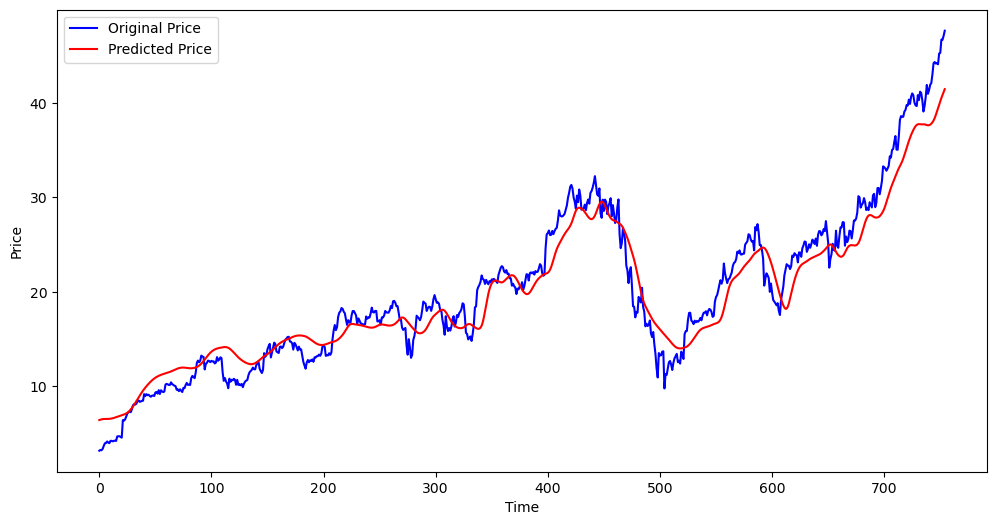

In [47]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label ='Original Price')
plt.plot(y_predicted,'r',label ='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()